<a href="https://colab.research.google.com/github/holdenkim/codingT/blob/main/BBGS_Part3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#맛보기1 분류문제

#분석 데이터 검토

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("breast-cancer-wisconsin.csv")

In [ ]:
data.head()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   code                         683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Cell_Size                    683 non-null    int64
 3   Cell_Shape                   683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [ ]:
data.describe()

,code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.349927
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


특성 나누기

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data[data.columns[1:10]]
y= data[data.columns[10:]]

In [ ]:
print(X.shape)
print(y.shape)

(683, 9)
(683, 1)


train test 나누기


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, stratify=y)

In [ ]:
print(y_train.mean())
print(y_test.mean())

Class    0.349609
dtype: float64
Class    0.350877
dtype: float64


정규화

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [ ]:
mms= MinMaxScaler()
mms.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
X_scaled_minmax_train = mms.transform(X_train)
X_scaled_minmax_test = mms.transform(X_test)

In [ ]:
pd.DataFrame(X_scaled_minmax_train).describe()

,0,1,2,3,4,5,6,7,8
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.372830,0.231988,0.242839,0.205078,0.241319,0.285590,0.269314,0.199002,0.067491
std,0.317836,0.334781,0.332112,0.319561,0.242541,0.404890,0.265289,0.331503,0.190373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.000000,0.000000
50%,0.333333,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.361111,0.444444,0.333333,0.333333,0.583333,0.444444,0.222222,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
pd.DataFrame(X_scaled_minmax_test).describe()

,0,1,2,3,4,5,6,7,8
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,0.411306,0.259909,0.256010,0.198181,0.269006,0.274204,0.278752,0.233918,0.065627
std,0.298847,0.357544,0.332700,0.315307,0.259557,0.405891,0.292578,0.360958,0.199372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000
50%,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000
75%,0.555556,0.444444,0.444444,0.222222,0.388889,0.444444,0.444444,0.388889,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


모델 학습 로지스틱 리스레션

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_scaled_minmax_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred_train = model.predict(X_scaled_minmax_train)
pred_test = model.predict(X_scaled_minmax_test)

In [ ]:
print(model.score(X_scaled_minmax_train, y_train))
print(model.score(X_scaled_minmax_test, y_test))

0.97265625
0.9590643274853801


모델평가

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,pred_test )

In [ ]:
print(cm)

[[106   5]
 [  2  58]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
cr = classification_report(y_test,pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       111
           1       0.92      0.97      0.94        60

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
from sklearn.metrics import auc, roc_curve
from sklearn import metrics
false_positive_rate, true_positive_rate, threshold = roc_curve(
    y_test, model.decision_function(X_scaled_minmax_test)
)
roc_auc = metrics.roc_auc_score(
    y_test, model.decision_function(X_scaled_minmax_test)
)

In [ ]:
roc_auc

0.9923423423423423

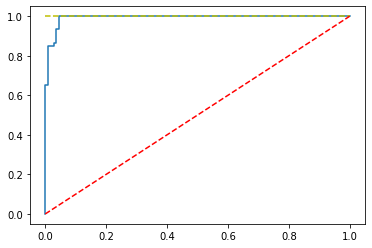

In [ ]:
import matplotlib.pyplot as plt
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[1,1],'y--')
plt.plot([0,1],[0,1],'r--')

예측값 병합 및 저장

In [ ]:
print(y_train.shape)
print(pred_train.shape)

(512, 4)
(512,)


In [ ]:
proba_train = model.predict_proba(X_scaled_minmax_train)
proba_test = model.predict_proba(X_scaled_minmax_test)

y_train[["y_pred"]]= pred_train
y_train[["y_proba0","y_proba1"]]= proba_train

#y_test[["y_pred"]]= pred_test
y_test[["y_proba0","y_proba1"]]= proba_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

# 맛보기 2 회귀문제

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('house_price.csv')

In [ ]:
data.head(2)

,housing_age,income,bedrooms,households,rooms,house_value
0,23,6.7770,0.141112,2.442244,8.103960,500000
1,49,6.0199,0.160984,2.726688,5.752412,500000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17689 entries, 0 to 17688
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   housing_age  17689 non-null  int64  
 1   income       17689 non-null  float64
 2   bedrooms     17689 non-null  float64
 3   households   17689 non-null  float64
 4   rooms        17689 non-null  float64
 5   house_value  17689 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 829.3 KB


In [ ]:
data.describe()

,housing_age,income,bedrooms,households,rooms,house_value
count,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000,17689.000000
mean,27.378823,3.671141,0.213278,2.952117,5.244001,189043.439313
std,11.280230,1.525937,0.051167,0.731573,1.184922,95487.122628
min,1.000000,0.499900,0.100000,0.750000,1.640000,14999.000000
25%,18.000000,2.532900,0.177464,2.470270,4.426829,114400.000000
50%,28.000000,3.453900,0.204104,2.854962,5.190779,171100.000000
75%,36.000000,4.591800,0.240157,3.316092,5.953728,242700.000000
max,51.000000,9.905500,0.498127,6.954023,11.901869,500000.000000


In [ ]:
temp= data.columns[0:5]
type(temp)

pandas.core.indexes.base.Index

In [ ]:
X = data[temp]
X1 = data[["housing_age","income","bedrooms","households","rooms"]]
y = data[["house_value"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.5706921210926263
0.5826083517811866


In [ ]:
y_test_pred = model.predict(X_test)

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error


In [ ]:
MSE = mean_squared_error (y_test, y_test_pred)

In [ ]:
np.sqrt(MSE)

61763.84882543206

In [ ]:
X_test['pred'] = y_test_pred

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test['house_price'] = y_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X_test

,housing_age,income,bedrooms,households,rooms,pred,house_price
17552,19,1.0481,0.251874,3.670846,4.181818,33552.694027,48500
5659,26,5.8683,0.132936,2.730483,7.172862,266109.596465,220500
5954,37,4.1094,0.177939,2.652582,5.830986,212922.500307,215800
733,16,6.3258,0.169569,3.155340,6.412621,290337.891760,390000
10290,32,2.2950,0.293907,4.188742,3.695364,135785.644577,155200
...,...,...,...,...,...,...,...
7770,34,5.5238,0.169824,3.451264,5.335740,262949.818829,185300
1822,19,3.8819,0.226279,1.897600,4.755200,226451.743868,328900
811,40,5.7143,0.148075,2.704819,6.102410,288121.570093,382400
868,16,2.6250,0.229714,1.910828,5.573248,151766.958670,377300


#범주 변수 변환

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('vote.csv')

In [ ]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           211 non-null    int64  
 1   region           211 non-null    int64  
 2   edu              211 non-null    int64  
 3   income           211 non-null    int64  
 4   age              211 non-null    int64  
 5   score_gov        211 non-null    int64  
 6   score_progress   211 non-null    int64  
 7   score_intention  211 non-null    float64
 8   vote             211 non-null    int64  
 9   parties          211 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 16.6 KB


In [ ]:
data.describe()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.341232,2.052133,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900,0.710900,2.668246
std,0.475251,1.448195,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078,0.454422,1.220416
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000,0.000000,2.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,2.000000,3.000000,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000,1.000000,4.000000
max,2.000000,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,4.000000


In [ ]:
data.columns[2:10]

Index(['edu', 'income', 'age', 'score_gov', 'score_progress',
       'score_intention', 'vote', 'parties'],
      dtype='object')

In [ ]:
X1 = data[["gender","region"]]
X2 = data[data.columns[0: 2]]
XY = data[data.columns[2:10]]

In [ ]:
X1['gender'] = X1['gender'].replace([1,2],['Male', 'Female'])
X1['region'] = X1['region'].replace([1,2,3,4,5],['S', 'C', 'H', 'Y','O'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
X1.head()

,gender,region
0,Male,Y
1,Male,O
2,Male,H
3,Female,S
4,Male,S


In [ ]:
X1_dum = pd.get_dummies(X1)

In [ ]:
X1_dum

,gender_Female,gender_Male,region_C,region_H,region_O,region_S,region_Y
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...
206,0,1,0,0,0,0,1
207,0,1,0,0,0,1,0
208,0,1,1,0,0,0,0
209,0,1,0,0,0,1,0


In [ ]:
Fvote = pd.concat([X1_dum, XY], axis=1)

In [ ]:
Fvote.head()

,gender_Female,gender_Male,region_C,region_H,region_O,region_S,region_Y,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,3,3,3,2,2,4.0,1,2
1,0,1,0,0,1,0,0,2,3,3,2,4,3.0,0,3
2,0,1,0,1,0,0,0,1,2,4,1,3,2.8,1,4
3,1,0,0,0,0,1,0,2,1,3,5,4,2.6,1,1
4,0,1,0,0,0,1,0,1,2,4,4,3,2.4,1,1


#데이터셋 분할과 모델검증

#7단원

In [2]:
import pandas as pd
data = pd.read_csv('Fvote.csv')

In [7]:
X = data[data.columns[0:13]]
y= data['vote']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, random_state=42)

In [11]:
from sklearn.model_selection import GridSearchCV
param_grid ={'C':[0.001,0.01,0.1,1,10,100]}

In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [14]:
print(grid_search.best_params_)

{'C': 10}


In [17]:
print(grid_search.best_score_)

0.7274193548387096


In [20]:
print(grid_search.score(X_test, y_test))

0.6792452830188679


In [21]:
result_grid = pd.DataFrame(grid_search.cv_results_)
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006841,0.001756,0.001202,0.000209,0.001,{'C': 0.001},0.68750,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
1,0.005412,0.000375,0.001011,0.000059,0.01,{'C': 0.01},0.68750,0.71875,0.71875,0.709677,0.709677,0.708871,0.011430,5,0.714286,0.706349,0.706349,0.708661,0.708661,0.708861,0.002903
2,0.009307,0.001268,0.001209,0.000134,0.1,{'C': 0.1},0.71875,0.71875,0.71875,0.677419,0.774194,0.721573,0.030797,3,0.730159,0.738095,0.738095,0.740157,0.708661,0.731034,0.011698
3,0.012040,0.000097,0.001246,0.000049,1,{'C': 1},0.71875,0.68750,0.81250,0.580645,0.806452,0.721169,0.085441,4,0.738095,0.785714,0.730159,0.763780,0.724409,0.748431,0.022993
4,0.017182,0.001178,0.001264,0.000109,10,{'C': 10},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.779528,0.724409,0.749994,0.021586
5,0.018240,0.002051,0.001241,0.000109,100,{'C': 100},0.75000,0.68750,0.81250,0.580645,0.806452,0.727419,0.086175,1,0.746032,0.769841,0.730159,0.771654,0.724409,0.748419,0.019567


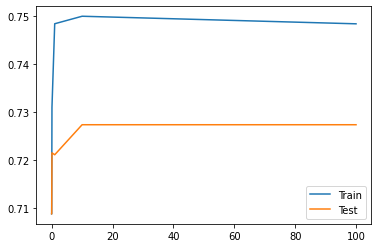

In [24]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_C'], result_grid['mean_train_score'], label='Train')
plt.plot(result_grid['param_C'], result_grid['mean_test_score'], label='Test')
plt.legend()

In [31]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs = {'C':randint(low=0.001, high=100)}

In [36]:
random_search = RandomizedSearchCV(LogisticRegression(), param_distribs, cv=5, n_iter=100, return_train_score=True)
random_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f470527e0d0>},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=0)

In [37]:
print(random_search.best_params_)

{'C': 54}


In [38]:
print(random_search.best_score_)

0.7274193548387096


In [39]:
print(random_search.score(X_test, y_test))

0.6792452830188679


In [44]:
result_random = random_search.cv_results_
result_grid = pd.DataFrame(result_random)

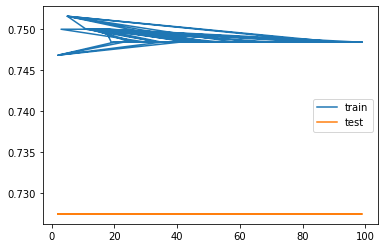

In [45]:
plt.plot(result_grid['param_C'],result_grid['mean_train_score'] ,label='train')
plt.plot(result_grid['param_C'],result_grid['mean_test_score'] ,label='test')
plt.legend()

이거 뭔가 많이 이상하네!!!